<a href="https://colab.research.google.com/github/EnayathShaik/AI_ML/blob/Practice/Airline_Passenger_Satisfaction_Prediction_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_aps = pd.read_csv('/content/Data.csv')
df_aps.shape

<ipython-input-2-80cc5857e73a>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aps = pd.read_csv('/content/Data.csv')


(129880, 24)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_aps.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,4,3,5,4,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,3,4,4,3,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,4,3,4,4,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,1,3,2,1,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,5,3,5,2,5,4,5,4,2,5,2,5,5,Satisfied


In [5]:
df_aps.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [6]:
df_aps.describe()

,ID,Age,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
#df_aps.info()

In [8]:
def rename_cols():
  col_mapper = {}
  replace_chars = str.maketrans({" ":"", "-":""})
  for col in df_aps.columns:
    if max(col.find(' '),col.find('-')) > -1 :
      col_mapper[col] = col.translate(replace_chars)
      #print(f"column: {col} - Replacement:{col.translate(replace_chars)}")
  print(col_mapper)
  df_aps.rename(columns = col_mapper, inplace= True)
rename_cols()
df_aps.head()

{'Customer Type': 'CustomerType', 'Type of Travel': 'TypeofTravel', 'Flight Distance': 'FlightDistance', 'Departure Delay': 'DepartureDelay', 'Arrival Delay': 'ArrivalDelay', 'Departure and Arrival Time Convenience': 'DepartureandArrivalTimeConvenience', 'Ease of Online Booking': 'EaseofOnlineBooking', 'Check-in Service': 'CheckinService', 'Online Boarding': 'OnlineBoarding', 'Gate Location': 'GateLocation', 'On-board Service': 'OnboardService', 'Seat Comfort': 'SeatComfort', 'Leg Room Service': 'LegRoomService', 'Food and Drink': 'FoodandDrink', 'In-flight Service': 'InflightService', 'In-flight Wifi Service': 'InflightWifiService', 'In-flight Entertainment': 'InflightEntertainment', 'Baggage Handling': 'BaggageHandling'}


,ID,Gender,Age,CustomerType,TypeofTravel,Class,FlightDistance,DepartureDelay,ArrivalDelay,DepartureandArrivalTimeConvenience,EaseofOnlineBooking,CheckinService,OnlineBoarding,GateLocation,OnboardService,SeatComfort,LegRoomService,Cleanliness,FoodandDrink,InflightService,InflightWifiService,InflightEntertainment,BaggageHandling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [9]:
df_aps.isnull().sum()

,0
ID,0
Gender,0
Age,0
CustomerType,0
TypeofTravel,0
Class,0
FlightDistance,0
DepartureDelay,0
ArrivalDelay,393
DepartureandArrivalTimeConvenience,0


In [10]:
df_arrDelay_NA = df_aps[df_aps['ArrivalDelay'].isnull()]

In [11]:
df_arrDelay_NA['ArrivalDelay'].unique()

array([nan])

In [12]:
df_arrDelay_NA['Satisfaction'].value_counts()

,count
Satisfaction,
Neutral or Dissatisfied,227
Satisfied,166


In [13]:
df_aps['Satisfaction'].value_counts()

,count
Satisfaction,
Neutral or Dissatisfied,73452
Satisfied,56428


In [14]:
DisSAArrDelay = df_aps.query('Satisfaction == "Neutral or Dissatisfied" & ArrivalDelay.notna()', engine = 'python')['ArrivalDelay'].mean()
print(round(DisSAArrDelay))

17


In [15]:
df_aps['ArrivalDelay'] = np.where((df_aps['ArrivalDelay'].isnull()) &
                                  (df_aps['Satisfaction'] == 'Satisfied'), 0, df_aps['ArrivalDelay'])

df_aps.query('Satisfaction == "Satisfied" & ArrivalDelay.isnull()', engine = 'python')

,ID,Gender,Age,CustomerType,TypeofTravel,Class,FlightDistance,DepartureDelay,ArrivalDelay,DepartureandArrivalTimeConvenience,EaseofOnlineBooking,CheckinService,OnlineBoarding,GateLocation,OnboardService,SeatComfort,LegRoomService,Cleanliness,FoodandDrink,InflightService,InflightWifiService,InflightEntertainment,BaggageHandling,Satisfaction


In [16]:
df_aps['ArrivalDelay'] = np.where((df_aps['ArrivalDelay'].isnull()) &
                                  (df_aps['Satisfaction'] == 'Neutral or Dissatisfied'), round(DisSAArrDelay), df_aps['ArrivalDelay'])

df_aps.query('Satisfaction == "Neutral or Dissatisfied" & ArrivalDelay.isnull()', engine = 'python')

,ID,Gender,Age,CustomerType,TypeofTravel,Class,FlightDistance,DepartureDelay,ArrivalDelay,DepartureandArrivalTimeConvenience,EaseofOnlineBooking,CheckinService,OnlineBoarding,GateLocation,OnboardService,SeatComfort,LegRoomService,Cleanliness,FoodandDrink,InflightService,InflightWifiService,InflightEntertainment,BaggageHandling,Satisfaction


In [17]:
df_aps['ArrivalDelay'].isnull().sum()

np.int64(0)

### Encoding values

In [18]:
df_aps.describe()

,ID,Age,DepartureDelay,ArrivalDelay,DepartureandArrivalTimeConvenience,EaseofOnlineBooking,CheckinService,OnlineBoarding,GateLocation,OnboardService,SeatComfort,LegRoomService,Cleanliness,FoodandDrink,InflightService,InflightWifiService,InflightEntertainment,BaggageHandling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,14.713713,15.075177,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,38.071126,38.411278,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [19]:
for col in df_aps.columns:
  print(f"########{col}")
  if(df_aps[col].dtype == object):
    print(f"{col} Value Counts {df_aps[col].value_counts()}")
  else:
    print(f"{col} Min : {df_aps[col].min()}-Max : {df_aps[col].max()}-Unique Counts : {df_aps[col].nunique()}")

########ID
ID Min : 1-Max : 129880-Unique Counts : 129880
########Gender
Gender Value Counts Gender
Female    65899
Male      63981
Name: count, dtype: int64
########Age
Age Min : 7-Max : 85-Unique Counts : 75
########CustomerType
CustomerType Value Counts CustomerType
Returning     106100
First-time     23780
Name: count, dtype: int64
########TypeofTravel
TypeofTravel Value Counts TypeofTravel
Business    89693
Personal    40187
Name: count, dtype: int64
########Class
Class Value Counts Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64
########FlightDistance
FlightDistance Value Counts FlightDistance
337     840
2475    467
236     438
447     422
370     385
       ... 
1441      1
1486      1
1336      1
1339      1
1001      1
Name: count, Length: 6848, dtype: int64
########DepartureDelay
DepartureDelay Min : 0-Max : 1592-Unique Counts : 466
########ArrivalDelay
ArrivalDelay Min : 0.0-Max : 1584.0-Unique Counts : 472
########Departure

In [20]:
#from sklearn.preprocessing import LabelEncoder
#labelEncoder = LabelEncoder()
#df_aps['Class']  = labelEncoder.fit_transform(df_aps['Class'])
#df_aps['Class'].unique()

In [21]:
#df_aps['Class'].head(10)

In [22]:
#df_aps['Class'].tail(10)

In [23]:
df_aps.drop(['ID'], axis=1, inplace=True)
df_aps.head()

,Gender,Age,CustomerType,TypeofTravel,Class,FlightDistance,DepartureDelay,ArrivalDelay,DepartureandArrivalTimeConvenience,EaseofOnlineBooking,CheckinService,OnlineBoarding,GateLocation,OnboardService,SeatComfort,LegRoomService,Cleanliness,FoodandDrink,InflightService,InflightWifiService,InflightEntertainment,BaggageHandling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [24]:
df_aps.rename(columns={'DepartureandArrivalTimeConvenience':'TimeConvenience'}, inplace= True)
df_aps.head()

,Gender,Age,CustomerType,TypeofTravel,Class,FlightDistance,DepartureDelay,ArrivalDelay,TimeConvenience,EaseofOnlineBooking,CheckinService,OnlineBoarding,GateLocation,OnboardService,SeatComfort,LegRoomService,Cleanliness,FoodandDrink,InflightService,InflightWifiService,InflightEntertainment,BaggageHandling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [25]:
#df_aps_Satisfaction = pd.get_dummies(df_aps['Satisfaction'])
#df_aps_Satisfaction.head()

In [26]:
#df_aps_Satisfaction.drop(['Neutral or Dissatisfied'], axis = 1, inplace= True)

In [27]:
#df_aps_Satisfaction.head()

In [28]:
#df_aps = pd.concat((df_aps,df_aps_Satisfaction), axis=1)
#df_aps.head()

In [29]:
#df_aps['Satisfaction'] = labelEncoder.fit_transform(df_aps['Satisfaction'])
#df_aps.head()

In [30]:
#df_aps['Gender'] = labelEncoder.fit_transform(df_aps['Gender'])
#df_aps['CustomerType'] = labelEncoder.fit_transform(df_aps['CustomerType'])
#df_aps['TypeofTravel'] = labelEncoder.fit_transform(df_aps['TypeofTravel'])
#df_aps.head()

In [31]:
cols_to_categorical = ['TimeConvenience', 'EaseofOnlineBooking','CheckinService','OnlineBoarding','GateLocation','OnboardService',
                      'SeatComfort' ,'LegRoomService','Cleanliness','FoodandDrink','InflightService','InflightWifiService',
                       'InflightEntertainment','BaggageHandling','Satisfaction']
cols_to_data = ['TimeConvenience', 'EaseofOnlineBooking','CheckinService','OnlineBoarding','GateLocation','OnboardService',
                      'SeatComfort' ,'LegRoomService','Cleanliness','FoodandDrink','InflightService','InflightWifiService',
                       'InflightEntertainment','BaggageHandling','Satisfaction']


In [32]:
replace_FD_chars = str.maketrans({"$":"", "%":""})
import re
for i in range(0, len(df_aps['FlightDistance'])):
  if not (bool(re.fullmatch(r'\d+',str(df_aps['FlightDistance'][i])))):
    df_aps['FlightDistance'][i] = df_aps['FlightDistance'][i].translate(replace_FD_chars)
    #df_aps[i, "FlightDistance"] = df_aps['FlightDistance'][i].translate(replace_FD_chars)

<ipython-input-32-a8369f5869d2>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_aps['FlightDistance'][i] = df_aps['FlightDistance'][i].translate(replace_FD_chars)
<ipython-input-32-a8369f5869d2>:5: SettingWithCopyWarning: 
A value is try

In [33]:
#for col in cols_to_categorical:
#  df_aps[col] = df_aps[col].astype('category')
#df_aps['FlightDistance'] = df_aps['FlightDistance'].astype('int')
#df_aps.head()

In [34]:
#df_aps['Satisfaction'] = df_aps['Satisfaction'].astype('category')

In [35]:
#df_aps.info()

In [36]:
df_aps['FlightDistance'] = df_aps['FlightDistance'].astype(np.int64)
df_aps['ArrivalDelay'] = df_aps['ArrivalDelay'].astype('int')
#df_aps.head()
df_aps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Gender                 129880 non-null  object
 1   Age                    129880 non-null  int64 
 2   CustomerType           129880 non-null  object
 3   TypeofTravel           129880 non-null  object
 4   Class                  129880 non-null  object
 5   FlightDistance         129880 non-null  int64 
 6   DepartureDelay         129880 non-null  int64 
 7   ArrivalDelay           129880 non-null  int64 
 8   TimeConvenience        129880 non-null  int64 
 9   EaseofOnlineBooking    129880 non-null  int64 
 10  CheckinService         129880 non-null  int64 
 11  OnlineBoarding         129880 non-null  int64 
 12  GateLocation           129880 non-null  int64 
 13  OnboardService         129880 non-null  int64 
 14  SeatComfort            129880 non-null  int64 
 15  

In [37]:
#df_aps_corr = df_aps.corr(i)
df_aps_corr = df_aps.select_dtypes(int).corr()

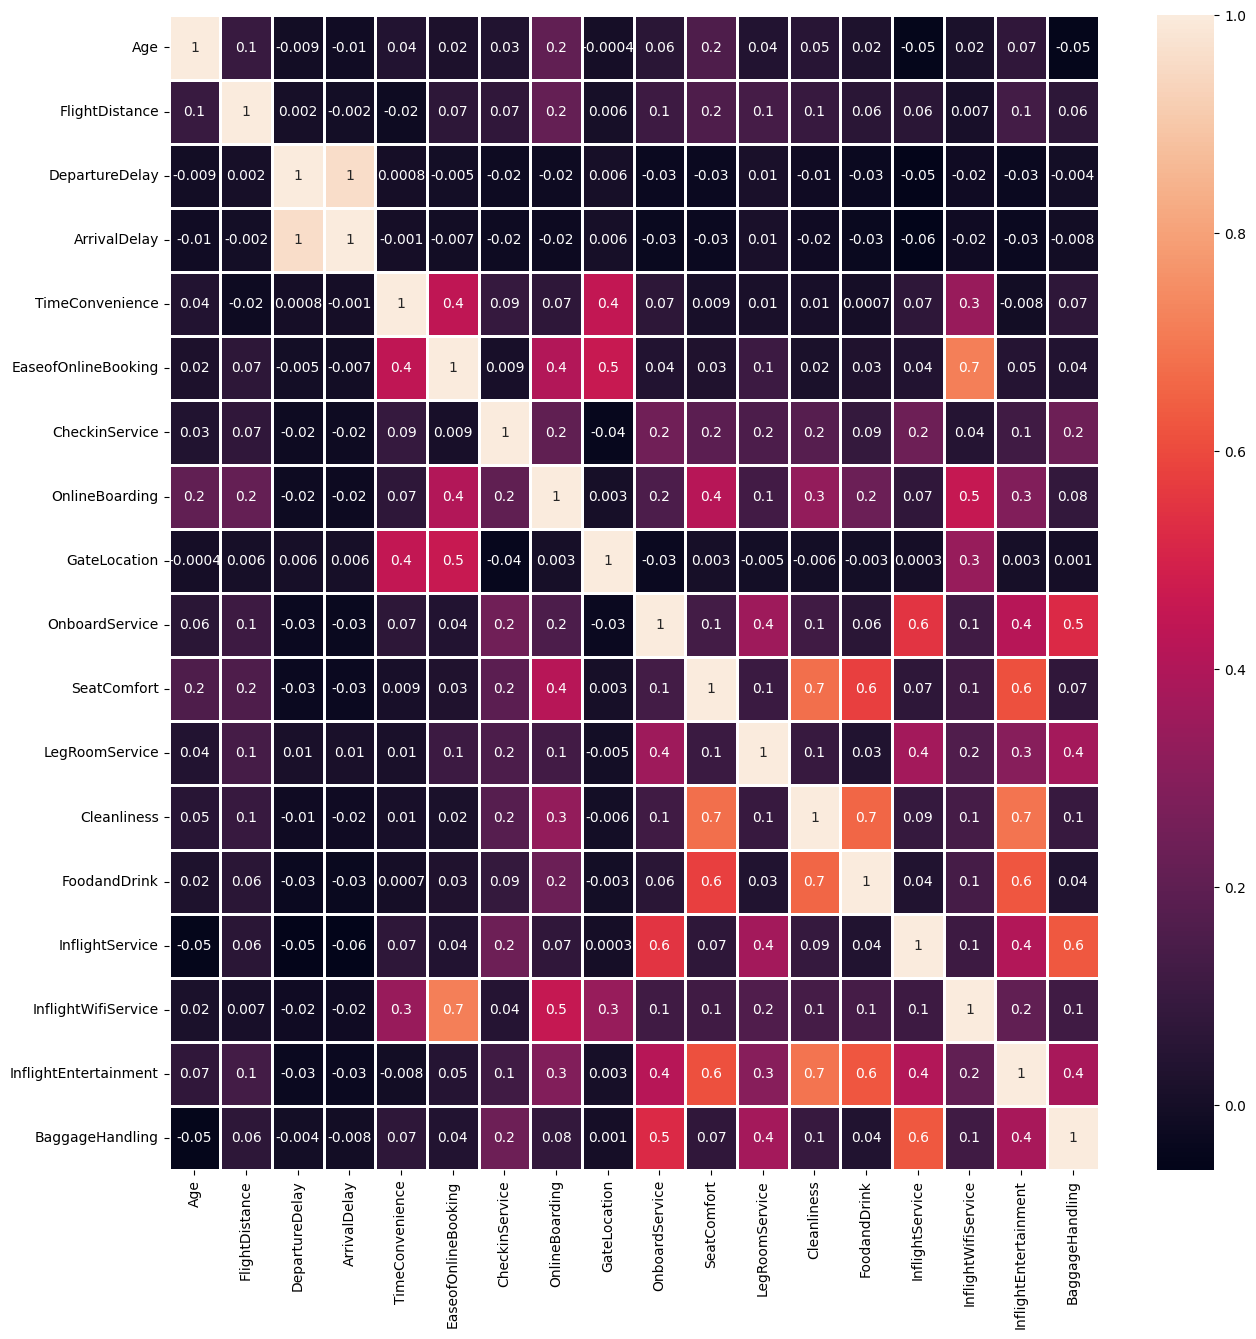

In [38]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df_aps_corr, annot= True, fmt = '.1g',linewidths = 2 , ax = ax)
plt.show()

In [39]:
## Arrival delay and Departure delay are highly correlated - Reason could be Delay in Departure lead to delay in arrival
df_aps.drop(['ArrivalDelay'], axis = 1, inplace= True)

In [40]:
x_features = list(df_aps.columns)
x_features.remove('Satisfaction')
x_features

['Gender',
 'Age',
 'CustomerType',
 'TypeofTravel',
 'Class',
 'FlightDistance',
 'DepartureDelay',
 'TimeConvenience',
 'EaseofOnlineBooking',
 'CheckinService',
 'OnlineBoarding',
 'GateLocation',
 'OnboardService',
 'SeatComfort',
 'LegRoomService',
 'Cleanliness',
 'FoodandDrink',
 'InflightService',
 'InflightWifiService',
 'InflightEntertainment',
 'BaggageHandling']

In [41]:
df_aps_encoded = pd.get_dummies(df_aps[x_features],drop_first = True)
df_aps_encoded.head()

,Age,FlightDistance,DepartureDelay,TimeConvenience,EaseofOnlineBooking,CheckinService,OnlineBoarding,GateLocation,OnboardService,SeatComfort,LegRoomService,Cleanliness,FoodandDrink,InflightService,InflightWifiService,InflightEntertainment,BaggageHandling,Gender_Male,CustomerType_Returning,TypeofTravel_Personal,Class_Economy,Class_Economy Plus
0,48,821,2,3,3,4,3,3,3,5,2,5,5,5,3,5,5,True,False,False,False,False
1,35,821,26,2,2,3,5,2,5,4,5,5,3,5,2,5,5,False,True,False,False,False
2,41,853,0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,True,True,False,False,False
3,50,1905,0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,True,True,False,False,False
4,49,3470,0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,False,True,False,False,False


In [42]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(df_aps['Satisfaction'])

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(df_aps_encoded,y, test_size = .25, stratify = y)

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(97410, 22)
(97410,)
(32470, 22)
(32470,)


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model_dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 7)
model_dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [48]:
y_pred = model_dtc.predict(x_test)

In [49]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [50]:
print(f"Decision Tree Model Accuracy Score: {metrics.accuracy_score(y_test,y_pred)}")

Decision Tree Model Accuracy Score: 0.9232830304896827


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     18363
           1       0.93      0.89      0.91     14107

    accuracy                           0.92     32470
   macro avg       0.92      0.92      0.92     32470
weighted avg       0.92      0.92      0.92     32470



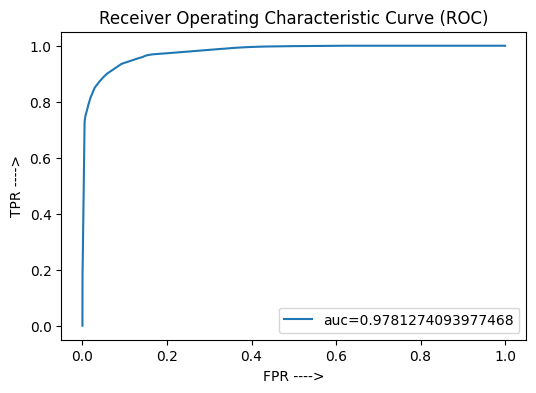

In [52]:
y_pred_proba = model_dtc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [53]:
#from sklearn.preprocessing import  StandardScaler
#sc = StandardScaler()
#x_train_sc = sc.fit_transform(x_train.select_dtypes(np.number))
#x_test_sc = sc.transform(x_test.select_dtypes(np.number))

In [54]:
x_train.head(10)

,Age,FlightDistance,DepartureDelay,TimeConvenience,EaseofOnlineBooking,CheckinService,OnlineBoarding,GateLocation,OnboardService,SeatComfort,LegRoomService,Cleanliness,FoodandDrink,InflightService,InflightWifiService,InflightEntertainment,BaggageHandling,Gender_Male,CustomerType_Returning,TypeofTravel_Personal,Class_Economy,Class_Economy Plus
86705,45,1747,0,3,3,4,4,3,2,4,2,5,4,2,3,2,2,False,True,False,False,False
40349,10,1428,0,2,2,1,3,2,3,4,5,3,3,4,3,3,4,False,True,False,True,False
110273,27,519,0,2,2,1,2,4,2,1,5,1,1,3,2,1,4,False,False,False,False,False
110624,32,727,38,4,2,2,2,4,1,3,2,3,3,3,3,3,2,False,True,False,False,False
56077,51,2586,6,1,3,5,1,4,5,5,4,5,3,2,3,1,4,True,True,True,True,False
41714,62,1404,0,3,3,3,3,5,5,1,4,1,1,2,4,1,1,True,True,True,True,False
69655,25,569,0,2,2,2,4,2,2,4,1,4,4,4,4,4,4,False,True,False,False,False
47921,37,550,0,4,2,4,2,4,4,3,5,5,5,3,2,5,3,True,True,True,True,False
76771,56,1778,0,4,4,5,4,4,2,4,2,4,2,2,4,2,2,True,True,False,False,False
56471,47,719,396,4,3,1,1,1,4,1,5,1,3,4,2,4,5,True,True,True,False,True


In [55]:
#x_train_sc[1:10]


In [56]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
#model_svc_ln = SVC(kernel='rbf', gamma = 0.5, C = 1.0)
#model_svc_ln.fit(x_train,y_train)
#y_pred = model_svc_ln.predict(x_test)
#print('Accuracy Score:')
#print(metrics.accuracy_score(y_test,y_pred))

In [58]:
model_ab = AdaBoostClassifier(n_estimators=20)

In [59]:
model_ab.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=20)

In [60]:
y_pred_model_ab = model_ab.predict(x_test)
print('Adaboost Model Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_model_ab))

Adaboost Model Accuracy Score:
0.8902987372959655


In [61]:
model_ab_50 = AdaBoostClassifier(n_estimators=50)

In [62]:
y_pred_model_ab_50 = model_ab.predict(x_test)
print('Adaboost Model Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_model_ab_50))

Adaboost Model Accuracy Score:
0.8902987372959655


In [63]:
#pip install --user xgboost

In [64]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(x_train,y_train)

GaussianNB()

In [65]:
y_pred_gnb = model_gnb.predict(x_test)
print('Naive Bayes Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_gnb))

Naive Bayes Accuracy Score:
0.863104404065291


In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
tuned_parameters = [{'criterion': ['gini','entropy'], 'max_depth': range(2,10)}]
model_DT = DecisionTreeClassifier()
modelGCV = GridSearchCV(model_DT, tuned_parameters, cv=10, scoring = 'roc_auc')
modelGCV.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [68]:
modelGCV.best_score_

np.float64(0.9864881087524031)

In [69]:
modelGCV.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [70]:
y_pred_gcv = modelGCV.predict(x_test)

In [71]:
print(f'GridSearch CV Model Accuracy Score:{metrics.accuracy_score(y_test,y_pred_gcv)}')

GridSearch CV Model Accuracy Score:0.9413920542038805


In [72]:
model_dt_bp = DecisionTreeClassifier(criterion='entropy', max_depth= 9)

In [73]:
model_dt_bp.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [74]:
y_pred_dtbs = model_dt_bp.predict(x_test)
print(f'DT with best params accuracy score:{metrics.accuracy_score(y_test,y_pred_dtbs)}')

DT with best params accuracy score:0.9413612565445026


In [75]:
print(classification_report(y_test, y_pred_dtbs))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18363
           1       0.94      0.93      0.93     14107

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470



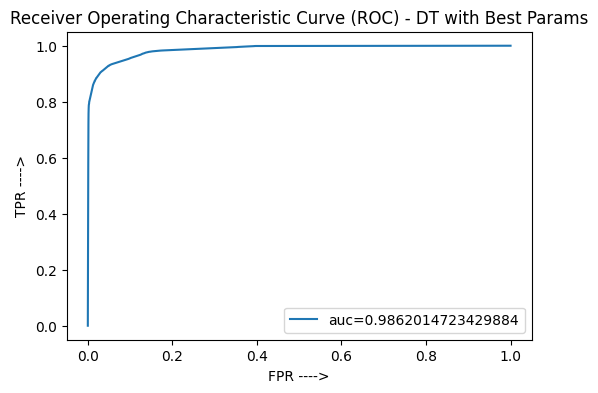

In [76]:
y_pred_proba_dtbs = model_dt_bp.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_dtbs)
auc = metrics.roc_auc_score(y_test, y_pred_proba_dtbs)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC) - DT with Best Params")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()